## importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from PIL import Image

## load and preprocess the data

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


## define the cnn architecture

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


## Compile the model



In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Train the model


In [5]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5176 - accuracy: 0.4434 - val_loss: 1.2253 - val_accuracy: 0.5671
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1654 - accuracy: 0.5852 - val_loss: 1.0685 - val_accuracy: 0.6198
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0165 - accuracy: 0.6430 - val_loss: 0.9978 - val_accuracy: 0.6484
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9191 - accuracy: 0.6775 - val_loss: 0.9254 - val_accuracy: 0.6760
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8425 - accuracy: 0.7028 - val_loss: 0.9210 - val_accuracy: 0.6779
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7865 - accuracy: 0.7253 - val_loss: 0.8847 - val_accuracy: 0.6906
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7377 - accuracy: 0.7388 - val_loss: 0.8818 -

## save the trained model

In [9]:
model.save("cifar10_model.h5")
print("Model saved as 'cifar10_model.h5'.")

Model saved as 'cifar10_model.h5'.


## Evaluate the model


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 3s - loss: 0.9073 - accuracy: 0.7047 - 3s/epoch - 8ms/step

Test accuracy: 0.7046999931335449


## Plot training and validation accuracy


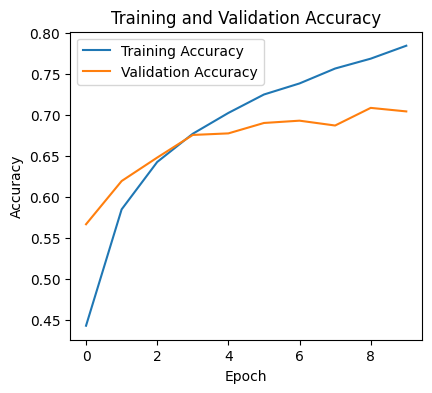

In [12]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

## Plot training and validation loss

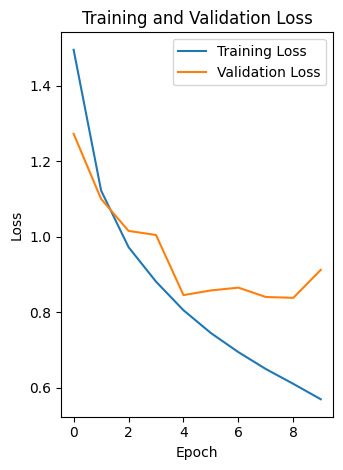

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()



## summary

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

## Confusion matrix


313/313 [==============================] - 5s 15ms/step


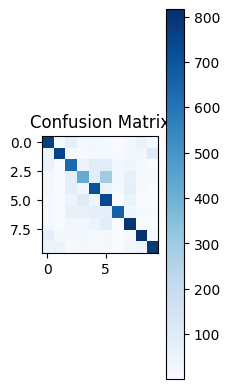

In [24]:
plt.subplot(1, 3, 3)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
confusion = tf.math.confusion_matrix(test_labels, predicted_labels)
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

## load the saved model for testing

In [27]:
loaded_model = tf.keras.models.load_model("cifar10_model.h5")


## load and preprocess image 

In [ ]:
image_path = r"C:\Users\hemal\OneDrive\Desktop\dog.jpg"  
image = Image.open(image_path)
image = image.resize((32, 32))
image_array = np.array(image)
image_array = image_array / 255.0
image_array = np.expand_dims(image_array, axis=0)


## prediction on the image

In [31]:
predictions = loaded_model.predict(image_array)
predicted_label = np.argmax(predictions)


1/1 [==============================] - 0s 362ms/step


## load the cifar-10 class names

In [32]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

## result

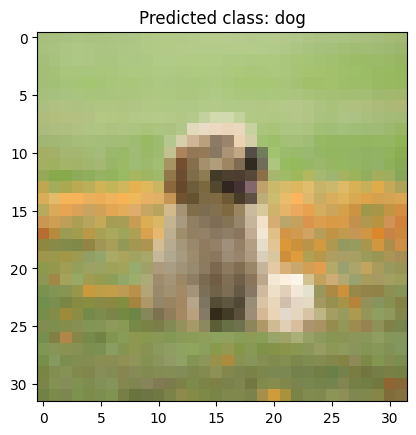

In [41]:
plt.imshow(image)
plt.title('Predicted class: ' + class_names[predicted_label])
plt.axis('on')
plt.show()